<a href="https://colab.research.google.com/github/oilportrait/test_colab/blob/main/Pima_Indians_Diabetes_Logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1번

In [86]:
import pandas as pd
targetUrl = "https://raw.githubusercontent.com/oilportrait/test_colab/main/diabetes.csv"
df = pd.read_csv(targetUrl, sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


글루코스, 혈압, 피부 두께, 인슐린 수치, BMI는 0이 될수 없으므로 0을 결측치로서 상대할 것이다.

In [91]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
import numpy as np

excluded_column = 'Pregnancies'

X.loc[:, X.columns != excluded_column] = X.loc[:, X.columns != excluded_column].replace(0, np.nan)


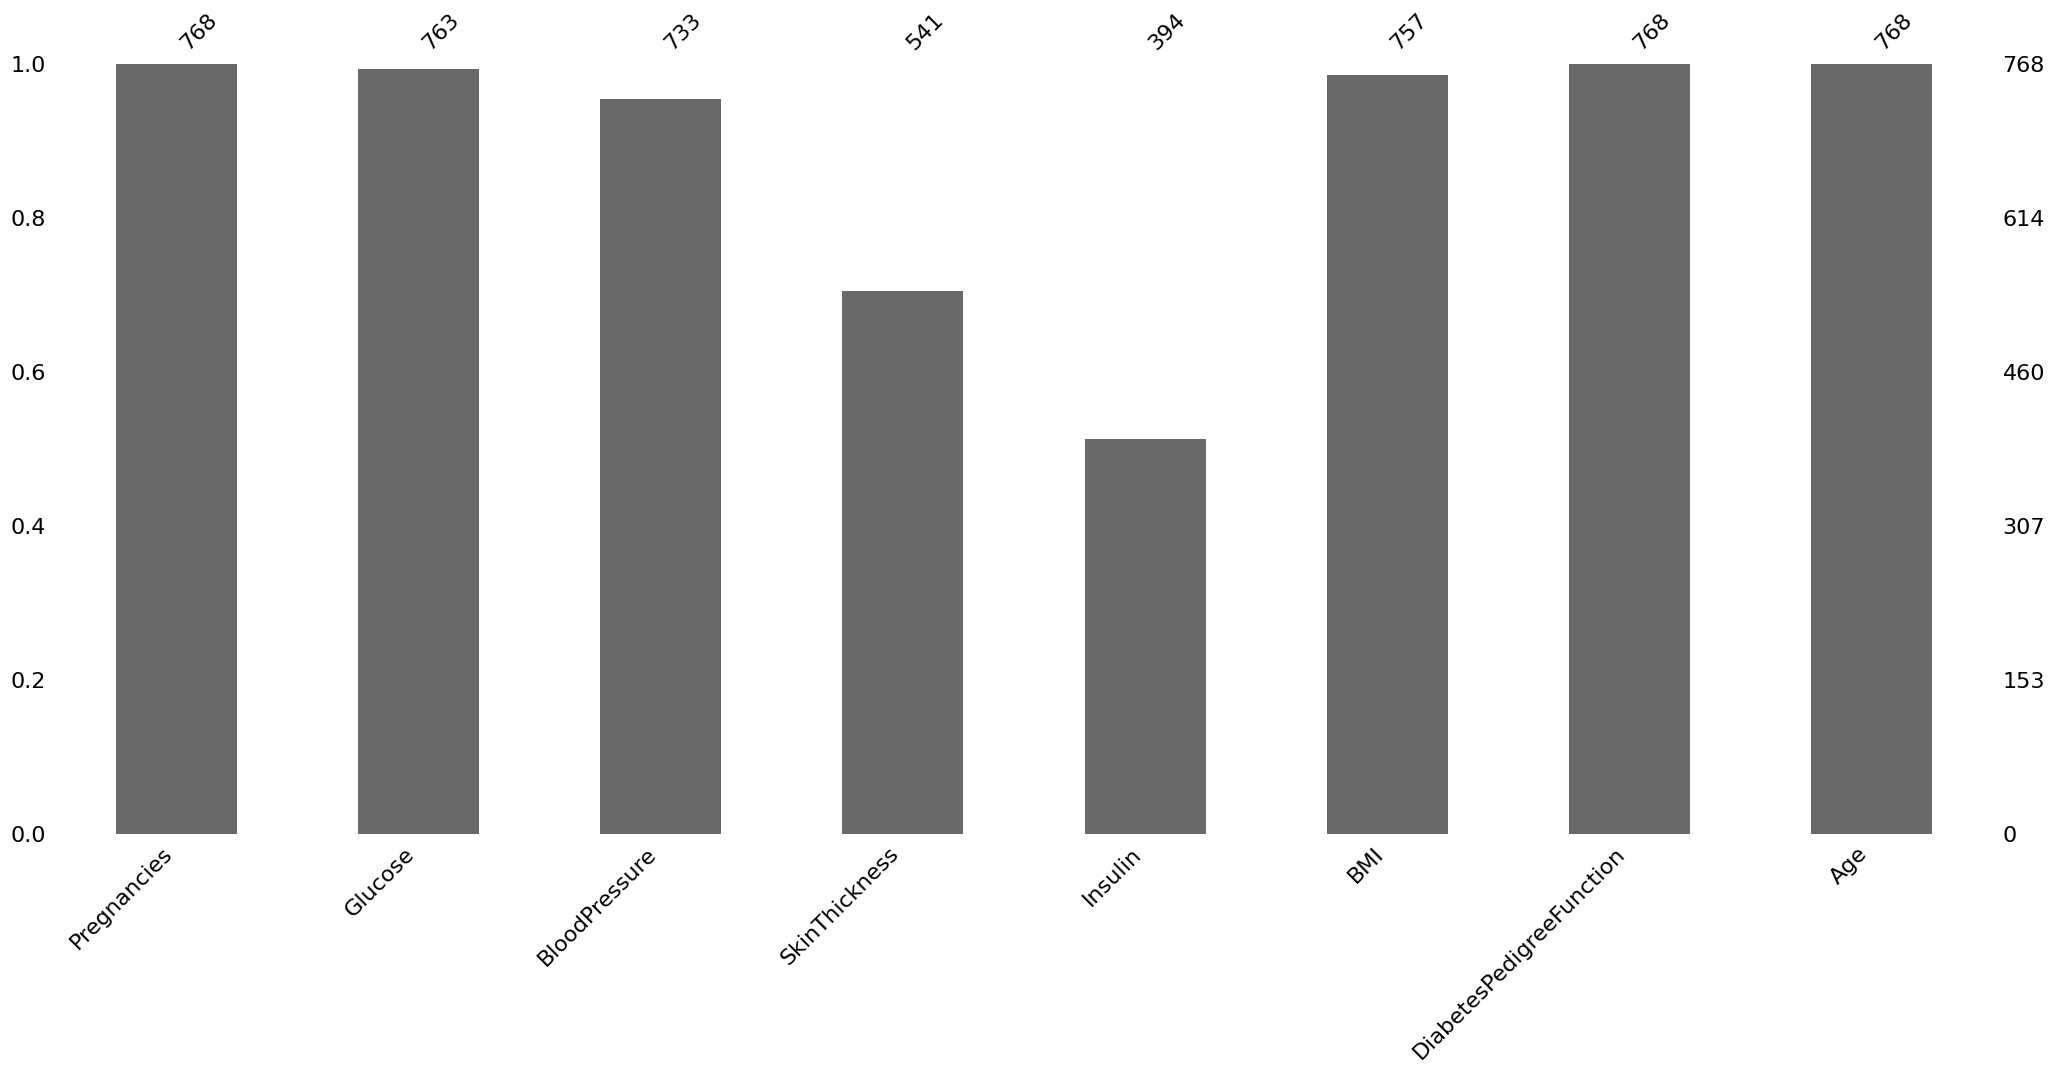

In [92]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(X)
plt.show()

knn을 이용하여 결측치를 채운다

<Axes: >

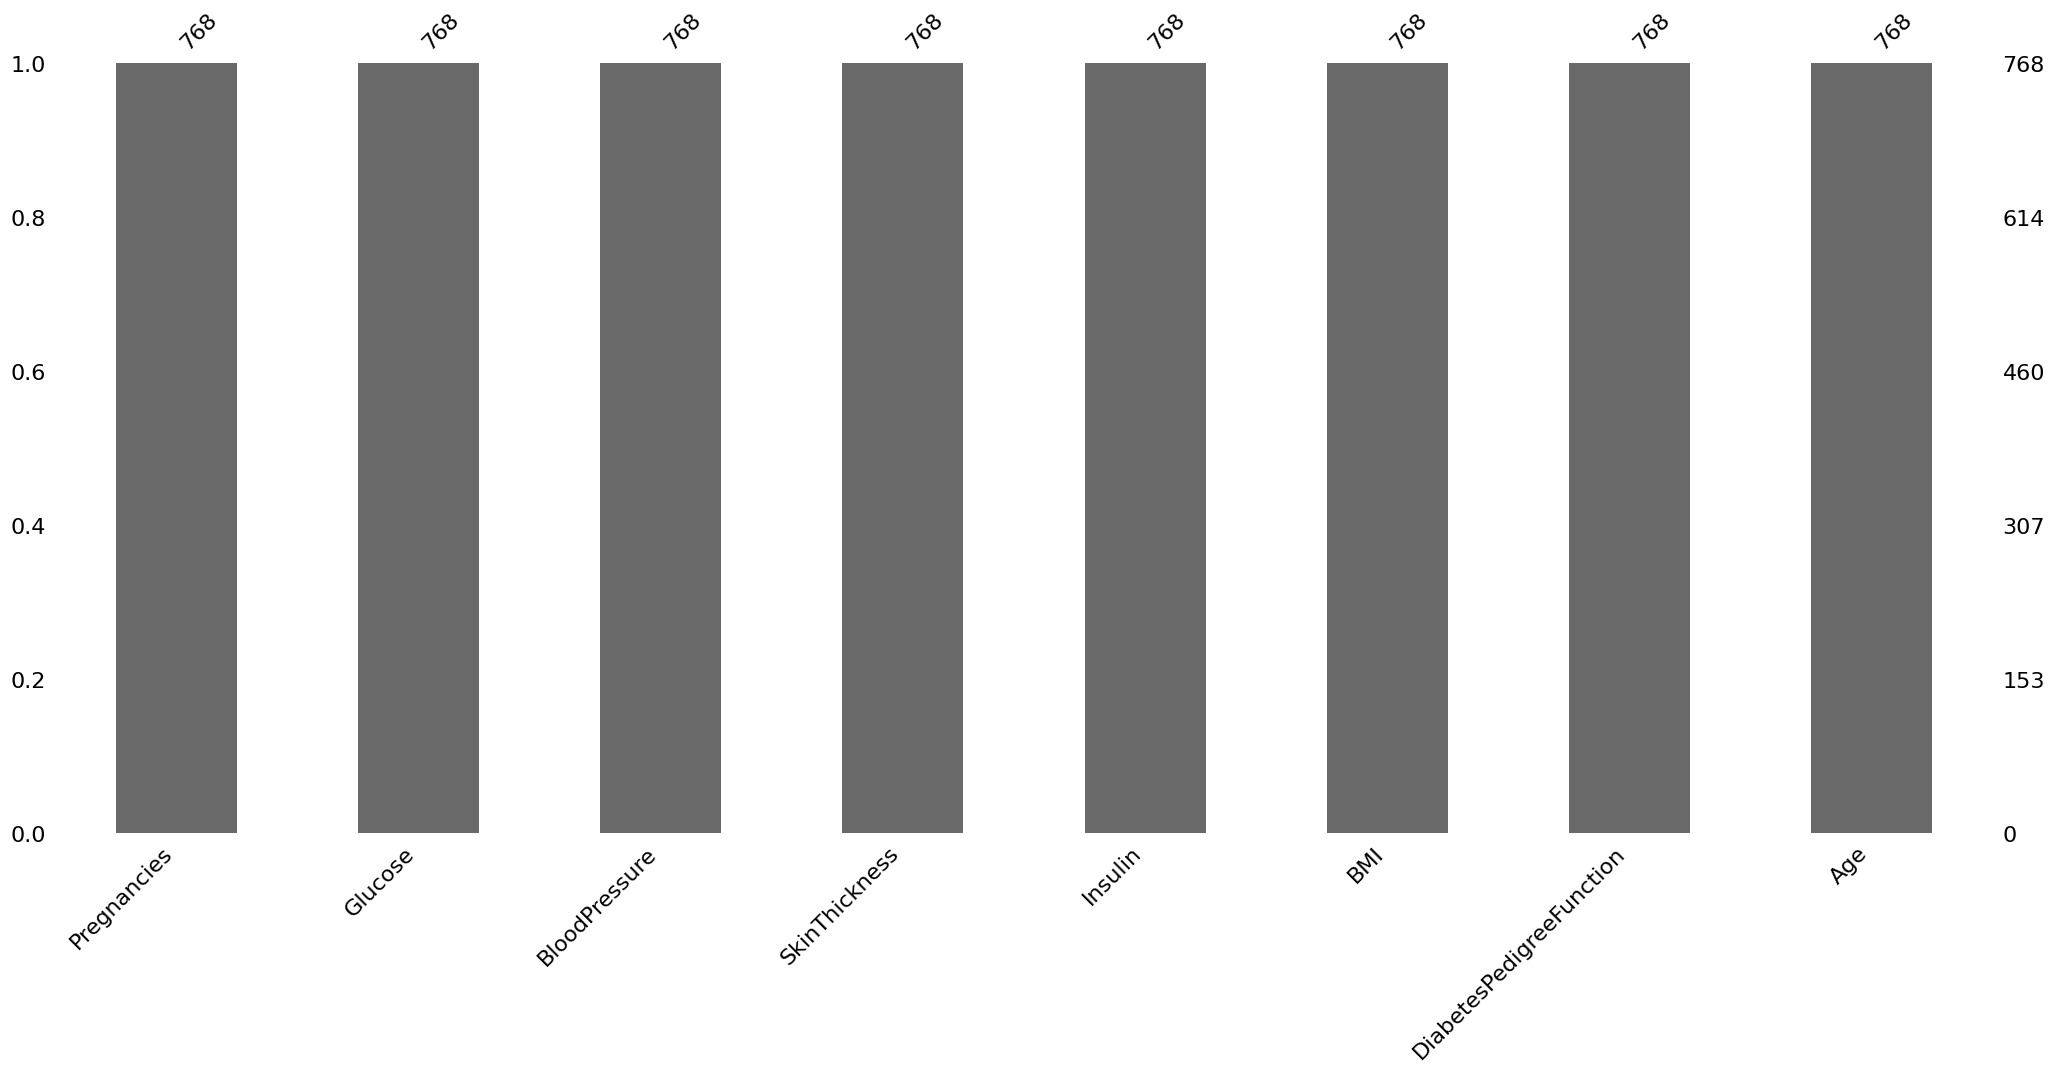

In [93]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'insulin', 'BMI']
imputer = KNNImputer(n_neighbors=5)

X[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = imputer.fit_transform(X[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]])
msno.bar(X)

당뇨병 유무가 불균형 하기에 언더 샘플링을 한 이후에 Logistic regression을 시도한다.

In [96]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.7835051546391752


2번

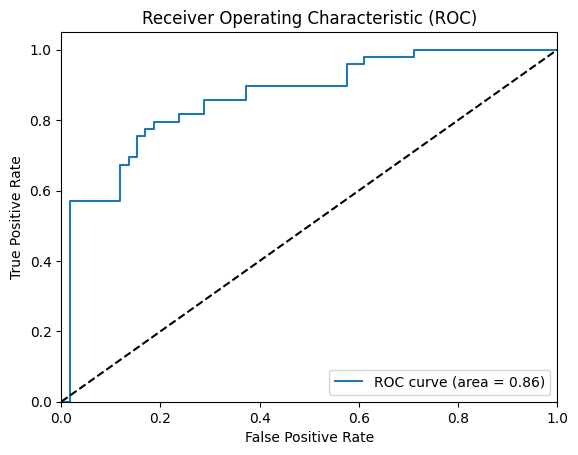

AUC: 0.8647526807333102


In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)